In [1]:
import os
import pandas as pd

# Klasör yolu
folder_path = "data/processed_csv_files"  # CSV dosyalarının bulunduğu klasör

# Tüm veriler için birleşik DataFrame
final_df = pd.DataFrame()

# Klasördeki tüm CSV dosyalarını döngüyle işleme
for file_name in os.listdir(folder_path):

    # Dosya adı parçalama
    parts = file_name.split(",")
    crime_type = parts[0].strip()  # Suç türü
    metric_type = parts[1].replace(".csv", "").strip()  # "number" veya "per100k"

    # CSV dosyasını yükleme
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # Yıl sütununu uzun formata (long format) dönüştürme
    df_long = pd.melt(
        df, 
        id_vars=["Country"], 
        var_name="Year", 
        value_name=f"{crime_type} ({metric_type})"
    )

    # Yıl sütununu sayısal hale getir
    df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")

    # Birleştirme
    if final_df.empty:
        final_df = df_long  # İlk dosya için başlangıç DataFrame
    else:
        final_df = pd.merge(final_df, df_long, on=["Country", "Year"], how="outer")
 

# İlk iki sütunu sabit tutarak, diğer sütunlarda tüm hücreleri NaN olan satırları kaldır
final_df = final_df[~final_df.iloc[:, 2:].isna().all(axis=1)]



In [2]:
# Tüm suç türlerinin toplamını ekle
# Number metrikli toplam
final_df["Total Crimes number"] = final_df.filter(like="(number)").sum(axis=1, skipna=True)

# Per 100k metrikli toplam
final_df["Total Crimes per100k"] = final_df.filter(like="(per100k)").sum(axis=1, skipna=True)

# Sütunları yeniden sıralama
number_columns = final_df.filter(like="(number)").columns.tolist()  # Tüm number sütunları
per100k_columns = final_df.filter(like="(per100k)").columns.tolist()  # Tüm per100k sütunları

final_df = final_df[["Country", "Year"] + number_columns + ["Total Crimes number"] + per100k_columns + ["Total Crimes per100k"]]

# Final DataFrame'i kaydet
output_file = "final_crime_data_with_totals_ordered.csv"
final_df.to_csv(output_file, index=False)

print(f"Birleştirilmiş ve sıralanmış veriler {output_file} dosyasına kaydedildi.")

Birleştirilmiş ve sıralanmış veriler final_crime_data_with_totals_ordered.csv dosyasına kaydedildi.


In [3]:


final_df

,Country,Year,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary of private residential premises (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),...,Rape (per100k),Robbery (per100k),Serious assault (per100k),Sexual assault (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft of a motorized vehicle or parts thereof (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k
0,Albania,2008,NaN,242.0,NaN,697.0,144.0,NaN,NaN,NaN,...,1.23,4.54,11.45,0.57,NaN,1.80,12.56,100.88,20.60,190.89
1,Albania,2009,NaN,231.0,NaN,757.0,169.0,NaN,NaN,NaN,...,1.07,5.31,11.90,0.91,NaN,1.98,15.83,96.49,20.32,192.87
2,Albania,2010,NaN,211.0,NaN,957.0,231.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,Albania,2011,NaN,214.0,NaN,979.0,265.0,NaN,NaN,NaN,...,0.78,9.46,5.97,0.78,NaN,1.55,21.58,163.19,26.13,285.38
4,Albania,2012,NaN,220.0,NaN,1238.0,322.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Türkiye,2018,NaN,NaN,NaN,74140.0,120400.0,NaN,NaN,NaN,...,NaN,13.60,NaN,9.31,NaN,NaN,45.40,310.19,NaN,621.67
611,Türkiye,2019,NaN,NaN,NaN,62842.0,103663.0,NaN,NaN,NaN,...,NaN,13.29,NaN,10.34,NaN,NaN,34.68,264.22,NaN,527.81
612,Türkiye,2020,NaN,NaN,NaN,58400.0,95767.0,NaN,NaN,NaN,...,NaN,13.52,NaN,9.32,NaN,NaN,39.09,238.25,NaN,487.94
613,Türkiye,2021,NaN,NaN,NaN,56476.0,95471.0,NaN,NaN,NaN,...,NaN,15.82,NaN,10.82,NaN,NaN,39.66,251.45,NaN,501.82


In [4]:
migration_df = pd.read_csv("data/imigration.csv", sep=";", decimal=",", thousands=".")



In [5]:
import pandas as pd

# Göç verilerini yükleyin (örneğin, migration_df)
# migration_df = pd.read_csv("path_to_migration_file.csv")  # Eğer CSV dosyasından yükleniyorsa
# Örnek DataFrame'i temizlemek için kod

# Sütunları sayısal türe dönüştür
for col in migration_df.columns[1:]:  # Country hariç diğer sütunlar
    migration_df[col] = pd.to_numeric(migration_df[col], errors='coerce')

# Uzun formata dönüştür
migration_long = pd.melt(
    migration_df,
    id_vars=["Country"],
    var_name="Year",
    value_name="Migration Data"
)

# Year sütununu sayısal türe dönüştür
migration_long["Year"] = pd.to_numeric(migration_long["Year"])

# Suç verilerini yükleyin (örneğin, crime_df)
# crime_df = pd.read_csv("path_to_crime_file.csv")  # Eğer CSV dosyasından yükleniyorsa

# İki DataFrame'i birleştirme
merged_df = pd.merge(
    final_df,
    migration_long,
    on=["Country", "Year"],
    how="inner"  # Ortak ülke ve yıl bilgileri olanları eşleştir
)

# Birleştirilmiş DataFrame'i kaydet
output_file = "merged_crime_migration_data.csv"

merged_df.to_csv(output_file, index=False)
merged_df.to_excel("merged_crime_migration_data.xlsx", index=False)

print(f"Birleştirilmiş veri {output_file} dosyasına kaydedildi.")
merged_df

Birleştirilmiş veri merged_crime_migration_data.csv dosyasına kaydedildi.


,Country,Year,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary of private residential premises (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),...,Robbery (per100k),Serious assault (per100k),Sexual assault (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft of a motorized vehicle or parts thereof (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k,Migration Data
0,Austria,2012,NaN,109.0,NaN,15479.0,85238.0,NaN,NaN,NaN,...,48.67,47.93,33.11,NaN,48.05,52.88,1742.60,23.67,3212.19,125605.0
1,Austria,2013,NaN,105.0,NaN,16548.0,88703.0,NaN,NaN,NaN,...,44.22,39.36,25.47,NaN,44.72,135.80,1822.11,322.19,3696.53,135228.0
2,Austria,2014,NaN,70.0,NaN,17110.0,85487.0,NaN,NaN,NaN,...,40.92,37.97,24.91,NaN,41.90,121.13,1742.86,342.83,3573.58,154260.0
3,Austria,2015,NaN,96.0,NaN,15516.0,79152.0,NaN,NaN,NaN,...,39.79,40.31,23.43,NaN,40.57,113.60,1635.37,385.72,3397.45,198658.0
4,Austria,2016,13103.0,99.0,20.0,12975.0,80503.0,685.0,3151.0,32543.0,...,35.66,43.60,32.46,9.6,50.53,103.83,1651.67,416.97,4011.98,158746.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Türkiye,2018,NaN,NaN,NaN,74140.0,120400.0,NaN,NaN,NaN,...,13.60,NaN,9.31,NaN,NaN,45.40,310.19,NaN,621.67,466890.0
268,Türkiye,2019,NaN,NaN,NaN,62842.0,103663.0,NaN,NaN,NaN,...,13.29,NaN,10.34,NaN,NaN,34.68,264.22,NaN,527.81,578488.0
269,Türkiye,2020,NaN,NaN,NaN,58400.0,95767.0,NaN,NaN,NaN,...,13.52,NaN,9.32,NaN,NaN,39.09,238.25,NaN,487.94,242496.0
270,Türkiye,2021,NaN,NaN,NaN,56476.0,95471.0,NaN,NaN,NaN,...,15.82,NaN,10.82,NaN,NaN,39.66,251.45,NaN,501.82,615095.0


Veri Özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 47 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           272 non-null    object 
 1   Year                                                              272 non-null    int64  
 2   Acts against computer systems (number)                            122 non-null    float64
 3   Attempted intentional homicide (number)                           244 non-null    float64
 4   Bribery (number)                                                  139 non-null    float64
 5   Burglary of private residential premises (number)                 230 non-null    float64
 6   Burglary (number)                                                 232 non-null    float64
 7   Child pornography (numb

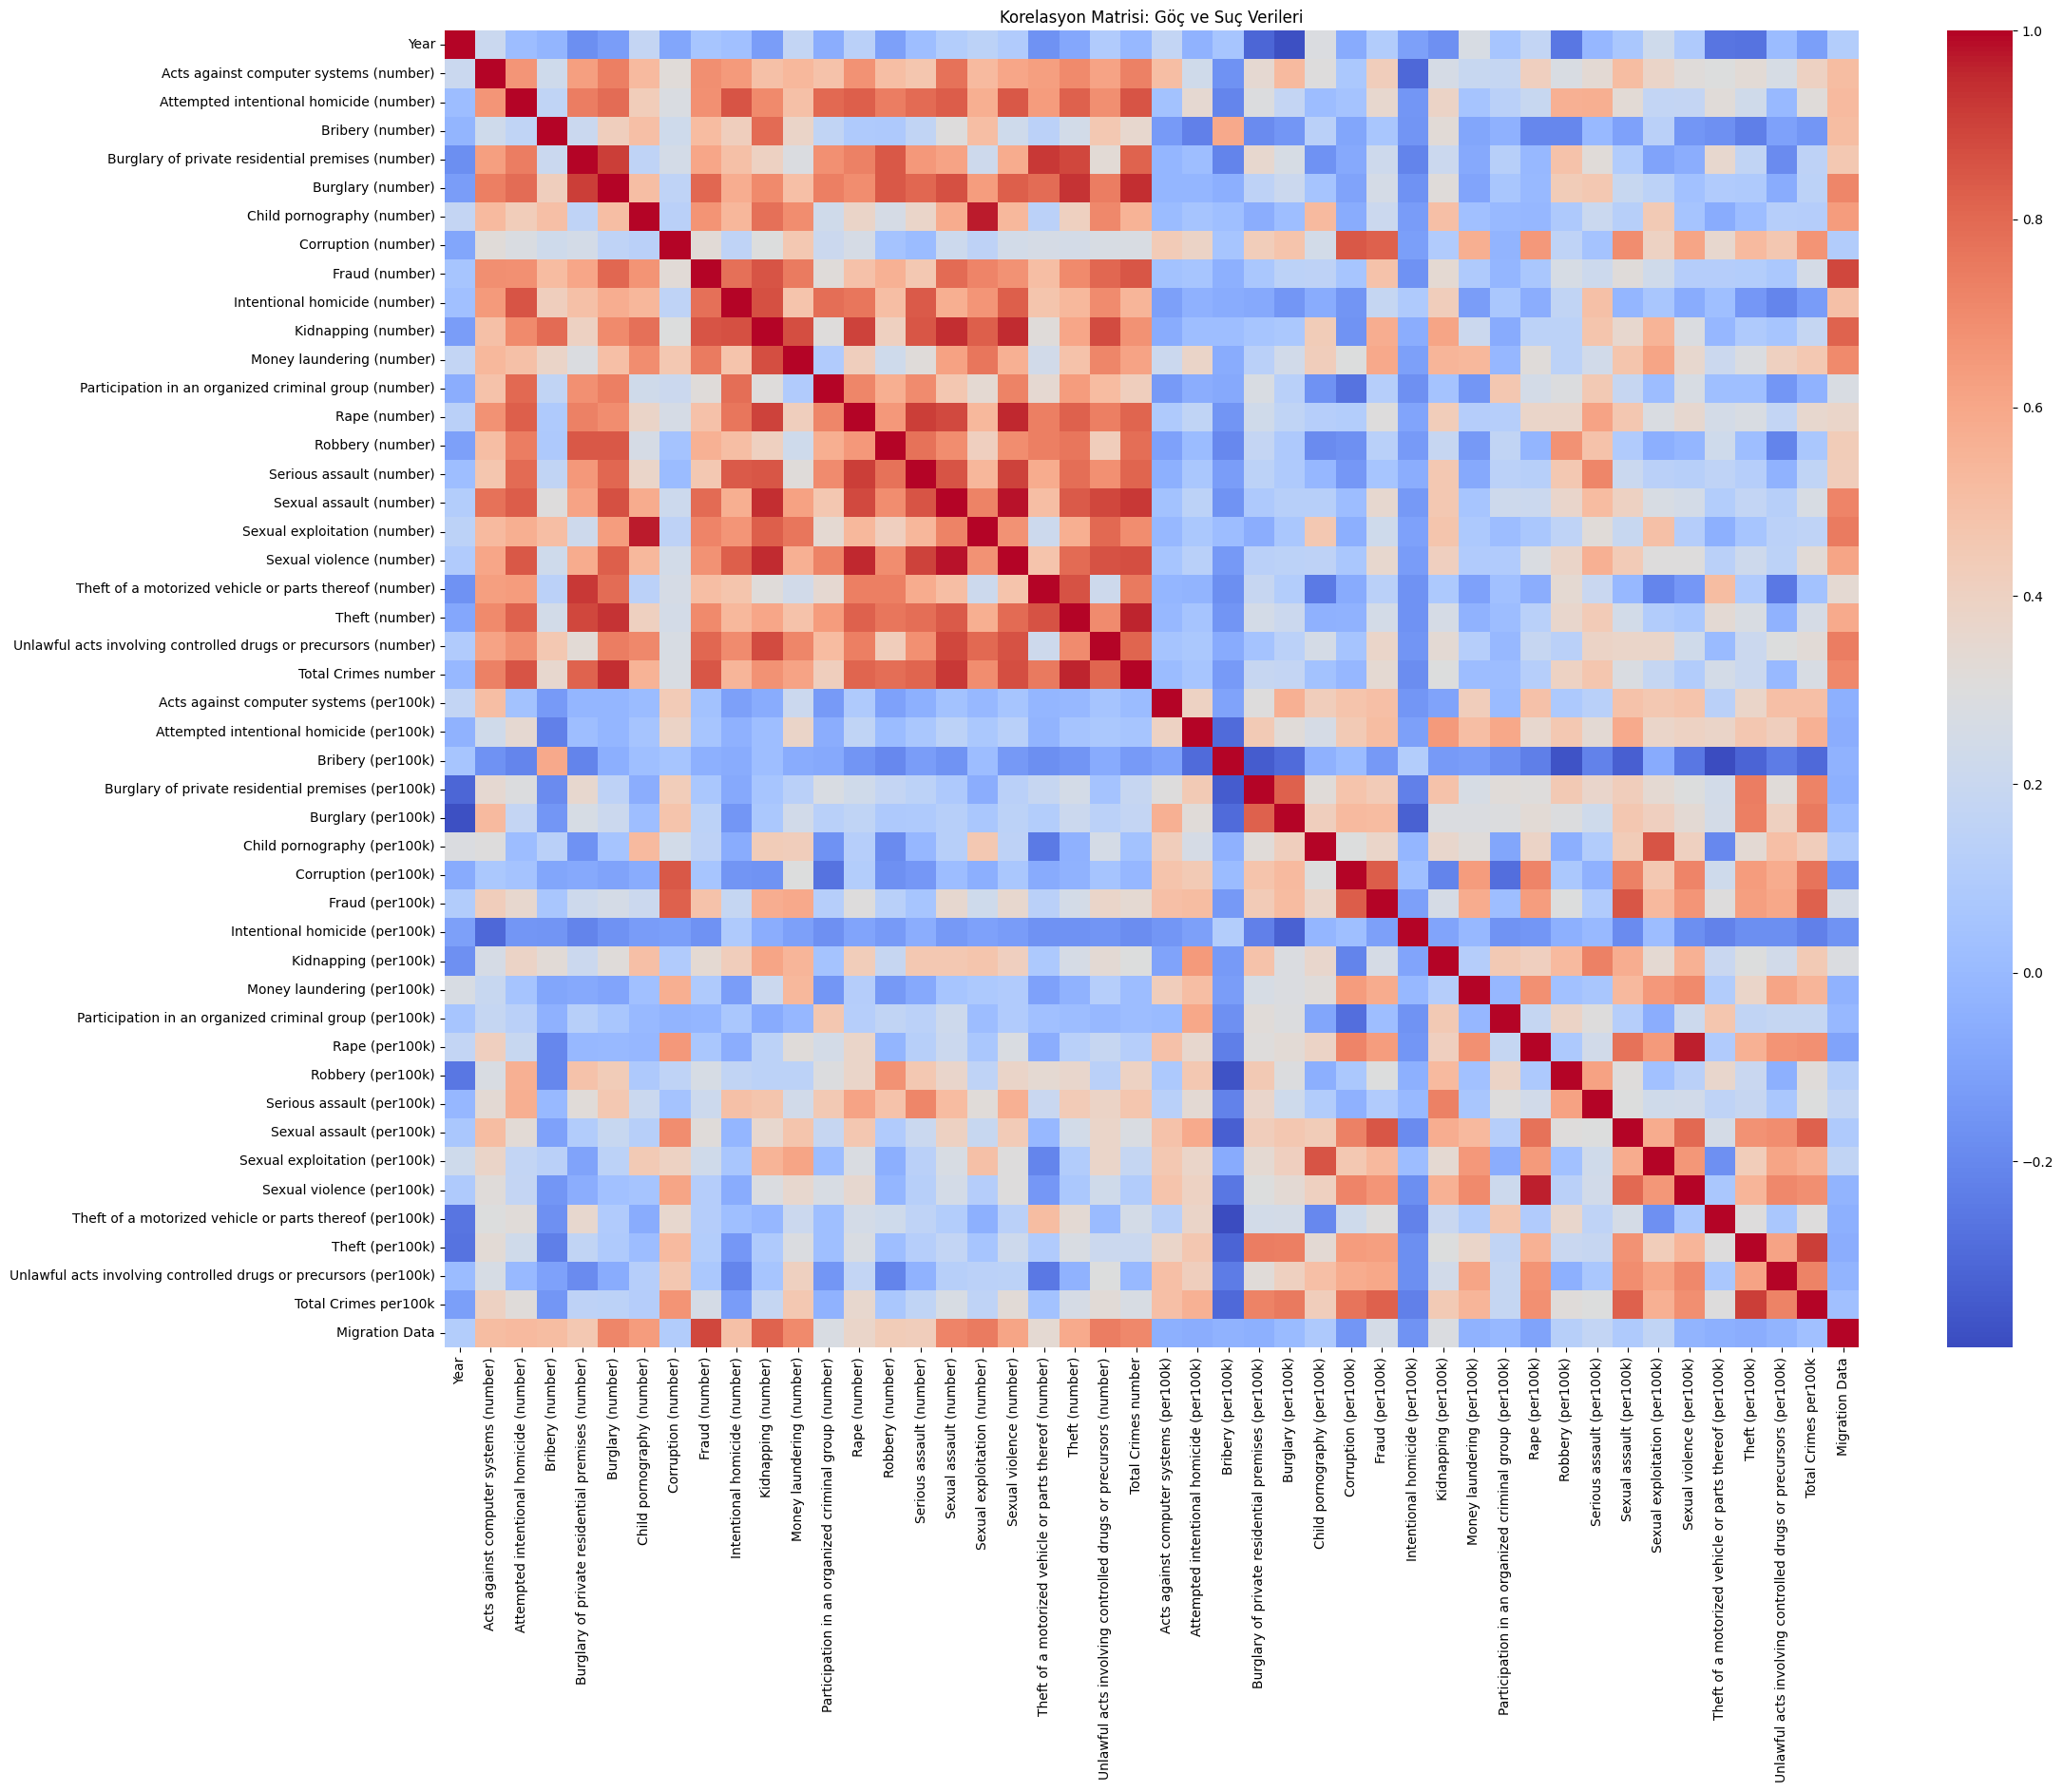

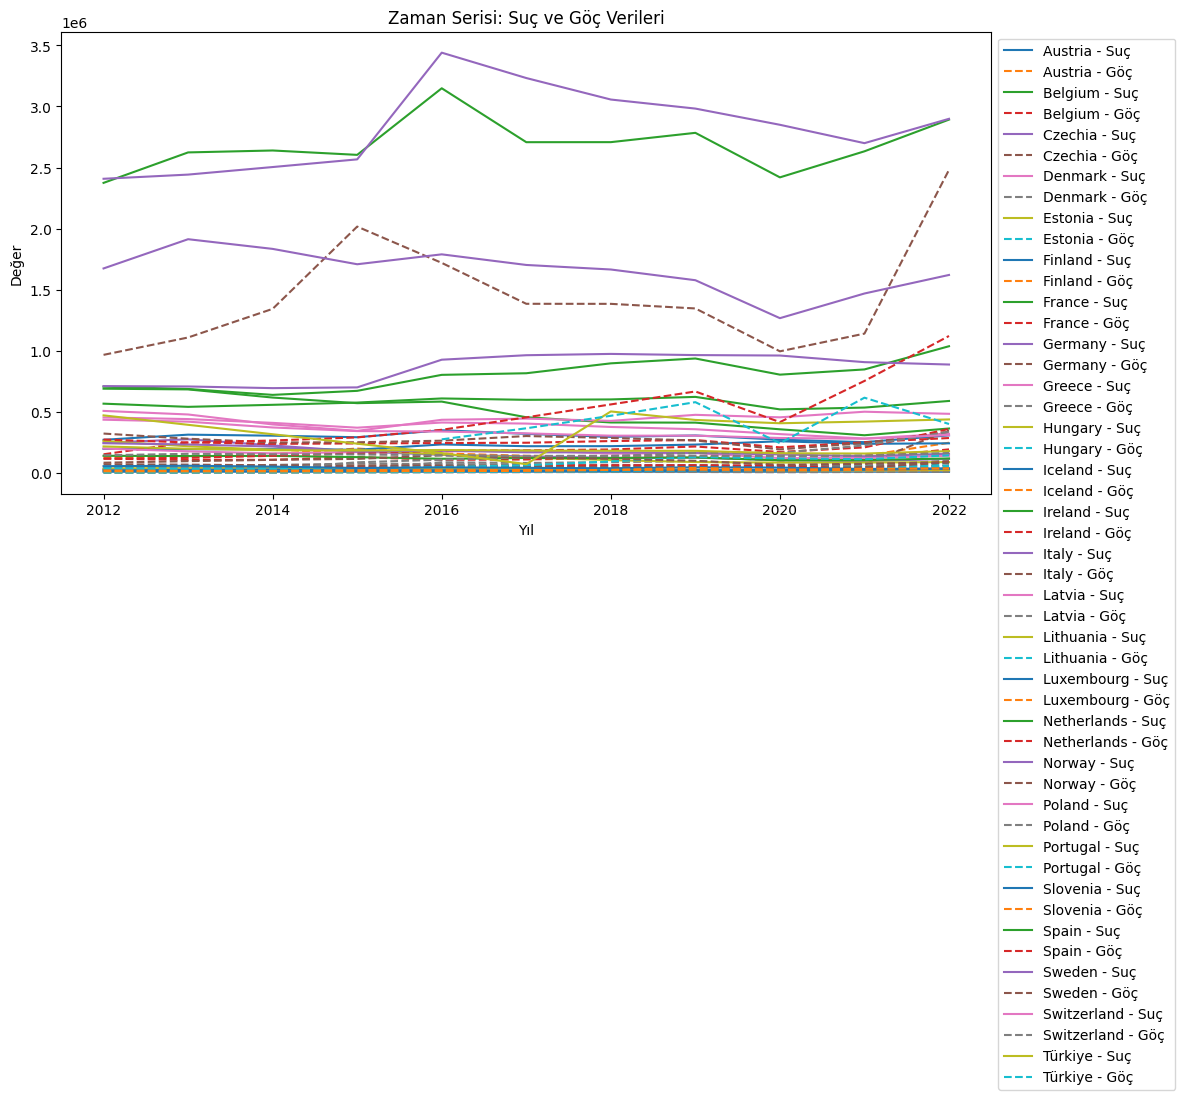

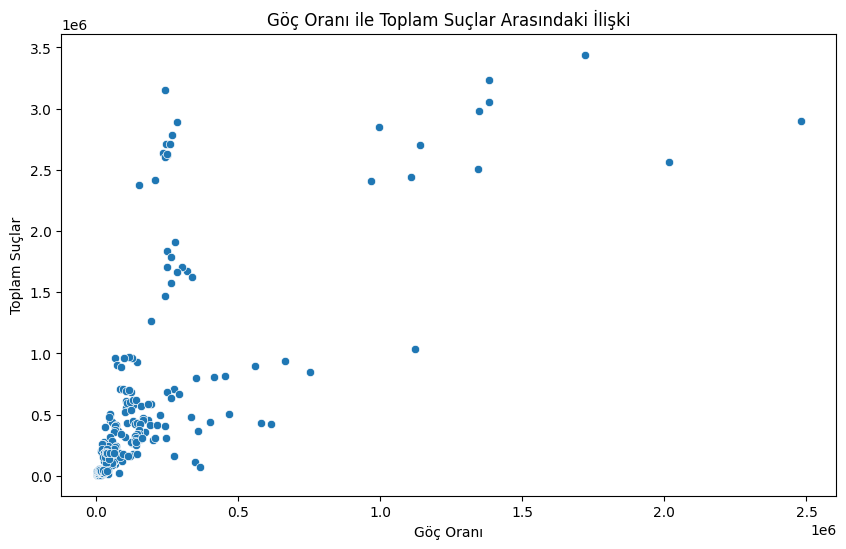

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri Özeti
print("Veri Özeti:")
print(merged_df.info())
print("\nEksik Değerler:")
print(merged_df.isnull().sum())

# Sayısal sütunların temel istatistikleri
print("\nSayısal Sütunların Temel İstatistikleri:")
print(merged_df.describe())

# Korelasyon Matrisi
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

print("\nKorelasyon Matrisi:")
print(correlation_matrix)

# Korelasyon Matrisi Görselleştirme
plt.figure(figsize=(24, 18
                    ))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi: Göç ve Suç Verileri")
plt.show()

# Zaman Serisi Görselleştirme (Örnek: Toplam Suçlar ve Göç)
plt.figure(figsize=(12, 6))
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Crimes number'], label=f"{country} - Suç")
    plt.plot(country_data['Year'], country_data['Migration Data'], label=f"{country} - Göç", linestyle="--")
plt.title("Zaman Serisi: Suç ve Göç Verileri")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Scatter Plot: Göç Oranı ile Suçlar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Migration Data', y='Total Crimes number', data=merged_df)
plt.title("Göç Oranı ile Toplam Suçlar Arasındaki İlişki")
plt.xlabel("Göç Oranı")
plt.ylabel("Toplam Suçlar")
plt.show()


En yüksek korelasyonlu ülkeler: ['Spain', 'France', 'Luxembourg']


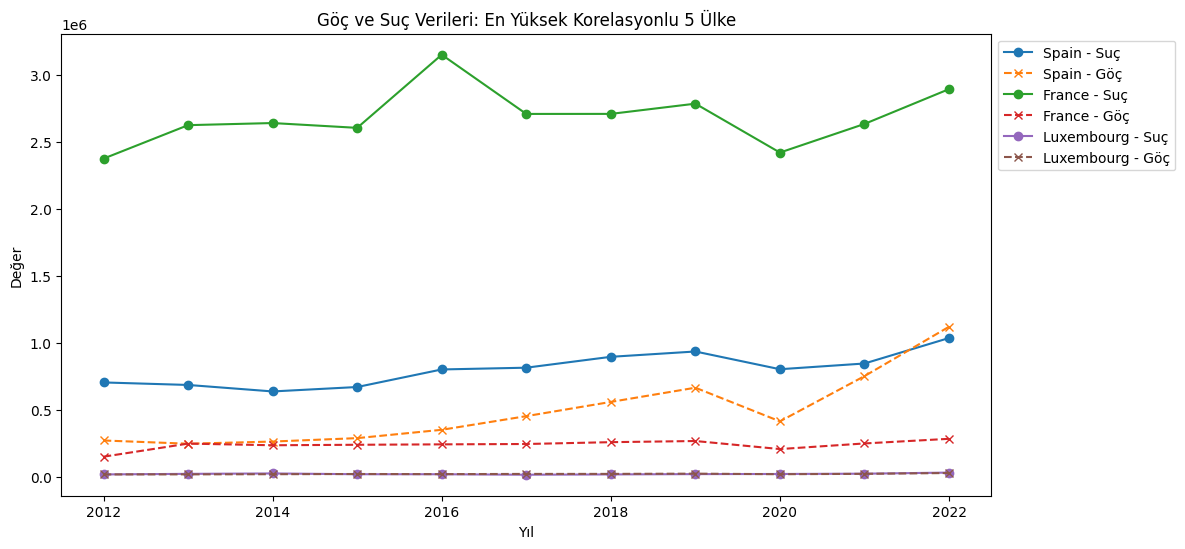

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ülke bazında korelasyon hesaplama
correlations = {}
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:  # En az iki veri noktası olması gerekir
        correlation = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = correlation

# En yüksek korelasyonlu 5 ülkeyi seçme
top_5_countries = sorted(correlations, key=correlations.get, reverse=True)[:3]
print("En yüksek korelasyonlu ülkeler:", top_5_countries)

# Grafik Çizimi
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Crimes number'], label=f"{country} - Suç", marker='o')
    plt.plot(country_data['Year'], country_data['Migration Data'], label=f"{country} - Göç", linestyle="--", marker='x')
plt.title("Göç ve Suç Verileri: En Yüksek Korelasyonlu 5 Ülke")
plt.xlabel("Yıl")
plt.ylabel("Değer")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


In [8]:
correlations = {}

# Her ülke için korelasyonu hesapla
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    if len(country_data) > 1:  # En az iki veri noktası olmalı
        corr = country_data['Migration Data'].corr(country_data['Total Crimes number'])
        correlations[country] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Ülke Bazında Korelasyonlar (Büyükten Küçüğe):")
for country, corr_value in sorted_correlations:
    print(f"{country}: {corr_value}")


Ülke Bazında Korelasyonlar (Büyükten Küçüğe):
Spain: 0.911416390852076
France: 0.6610724321125294
Luxembourg: 0.5766160049884523
Norway: 0.505940958583194
Türkiye: 0.4686649420125706
Italy: 0.45588092634806143
Finland: 0.44974826956200475
Switzerland: 0.36565567085052453
Poland: 0.3642496875294868
Belgium: 0.287618332691998
Germany: 0.27694705462062785
Austria: 0.24173288360844572
Sweden: 0.07142604642701103
Iceland: -0.03952307337861347
Greece: -0.055470405396783544
Denmark: -0.2301521126853827
Ireland: -0.2708696337544196
Czechia: -0.36618504276583996
Estonia: -0.5645291716148784
Slovenia: -0.5767561461911116
Lithuania: -0.6247922024996937
Portugal: -0.6561481018496539
Netherlands: -0.6767371090682527
Latvia: -0.7172144134538491
Hungary: -0.901408353712368


In [9]:
correlations_by_crime = {}

# Sadece "number" metrikli suç türlerini seç
crime_columns = [col for col in merged_df.columns if "(number)" in col]

# Her suç türü için korelasyonu hesapla
for crime in crime_columns:
    corr = merged_df[crime].corr(merged_df['Migration Data'])
    correlations_by_crime[crime] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_crime_correlations = sorted(correlations_by_crime.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):")
for crime, corr_value in sorted_crime_correlations:
    print(f"{crime}: {corr_value}")


Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):
Fraud (number): 0.8895521171049194
Kidnapping (number): 0.8149204426559269
Sexual exploitation (number): 0.7477655037135973
Unlawful acts involving controlled drugs or precursors (number): 0.7379106552443898
Sexual assault (number): 0.720517596712689
Burglary (number): 0.7117828639595151
Money laundering (number): 0.7046864963534232
Child pornography (number): 0.6412722410654397
Sexual violence (number): 0.6103915708319239
Theft (number): 0.5884045138214838
Attempted intentional homicide (number): 0.5205810547658161
Acts against computer systems (number): 0.5139043668011993
Bribery (number): 0.5090938195675319
Intentional homicide (number): 0.4975847994231903
Burglary of private residential premises (number): 0.45898997369328265
Robbery (number): 0.4363989171371874
Serious assault (number): 0.4238855039029627
Rape (number): 0.376880476782769
Theft of a motorized vehicle or parts thereof (number): 0.3418833647541547
Participation in an

In [10]:
# Avrupa bazında toplam değerler hesapla
europe_total = merged_df.groupby("Year").sum(numeric_only=True)
europe_total



,Acts against computer systems (number),Attempted intentional homicide (number),Bribery (number),Burglary of private residential premises (number),Burglary (number),Child pornography (number),Corruption (number),Fraud (number),Intentional homicide (number),Kidnapping (number),...,Robbery (per100k),Serious assault (per100k),Sexual assault (per100k),Sexual exploitation (per100k),Sexual violence (per100k),Theft of a motorized vehicle or parts thereof (per100k),Theft (per100k),Unlawful acts involving controlled drugs or precursors (per100k),Total Crimes per100k,Migration Data
Year,,,,,,,,,,,,,,,,,,,,,
2012,0.0,12109.0,0.0,1244035.0,2109810.0,0.0,0.0,0.0,6000.0,24084.0,...,1878.22,2147.96,561.83,0.00,856.39,3554.48,44074.61,7010.54,80408.57,2669310.0
2013,0.0,11283.0,0.0,1225085.0,1969203.0,0.0,0.0,0.0,4154.0,10533.0,...,1767.17,2029.50,530.59,0.00,1135.17,3755.03,43610.35,7616.87,80083.19,2890014.0
2014,0.0,8363.0,0.0,1168082.0,1874871.0,0.0,0.0,0.0,3986.0,10787.0,...,1543.20,1920.45,555.15,0.00,978.12,3552.34,41089.31,8027.31,76326.93,3152299.0
2015,0.0,8676.0,0.0,1113852.0,1794729.0,0.0,0.0,0.0,4182.0,11467.0,...,1424.15,1836.75,528.65,0.00,983.46,2863.53,38619.05,7930.62,70669.13,4024281.0
2016,55906.0,9142.0,17273.0,1019978.0,1655135.0,11529.0,98459.0,2233195.0,3778.0,11009.0,...,1332.96,1739.11,539.18,159.61,1071.45,2480.18,35906.66,8026.91,77254.01,4154595.0
2017,65377.0,9429.0,11915.0,702333.0,1490689.0,23993.0,71608.0,2157319.0,3740.0,6990.0,...,1244.59,1754.38,576.52,234.32,1104.11,2106.31,34283.41,8172.35,73027.58,4066848.0
2018,68582.0,9750.0,17527.0,731765.0,1501017.0,25445.0,71993.0,2243151.0,5506.0,5771.0,...,1180.66,1812.61,560.55,236.79,1168.90,1881.78,32060.94,8226.62,71174.68,4357615.0
2019,86246.0,9952.0,10518.0,656323.0,1431371.0,43053.0,67521.0,2415205.0,5236.0,5835.0,...,1173.75,1855.78,577.61,353.36,1215.94,1991.92,31658.82,8526.39,71210.67,4653128.0
2020,99770.0,10623.0,13500.0,523186.0,1269570.0,44636.0,65327.0,2543386.0,5455.0,5803.0,...,980.96,1692.53,559.59,351.75,1164.36,1854.01,27228.48,8289.79,65458.65,3341443.0


Avrupa Bazında Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):
Sexual assault (number): 0.8125049820229802
Sexual violence (number): 0.807955311664858
Money laundering (number): 0.7835649521387741
Rape (number): 0.7794519954175313
Acts against computer systems (number): 0.7430339728320826
Sexual exploitation (number): 0.7169131691418721
Serious assault (number): 0.654802693680397
Unlawful acts involving controlled drugs or precursors (number): 0.6529907757739858
Fraud (number): 0.64635292373119
Participation in an organized criminal group (number): 0.5360443021341305
Corruption (number): 0.5123952016241168
Bribery (number): 0.45898988866721424
Intentional homicide (number): 0.2582470329559292
Child pornography (number): 0.08077805582259066
Attempted intentional homicide (number): 0.062337296238505785
Theft (number): -0.4286504135219648
Kidnapping (number): -0.5516841720851422
Robbery (number): -0.6130375592576561
Burglary of private residential premises (number): -0.637770592947574

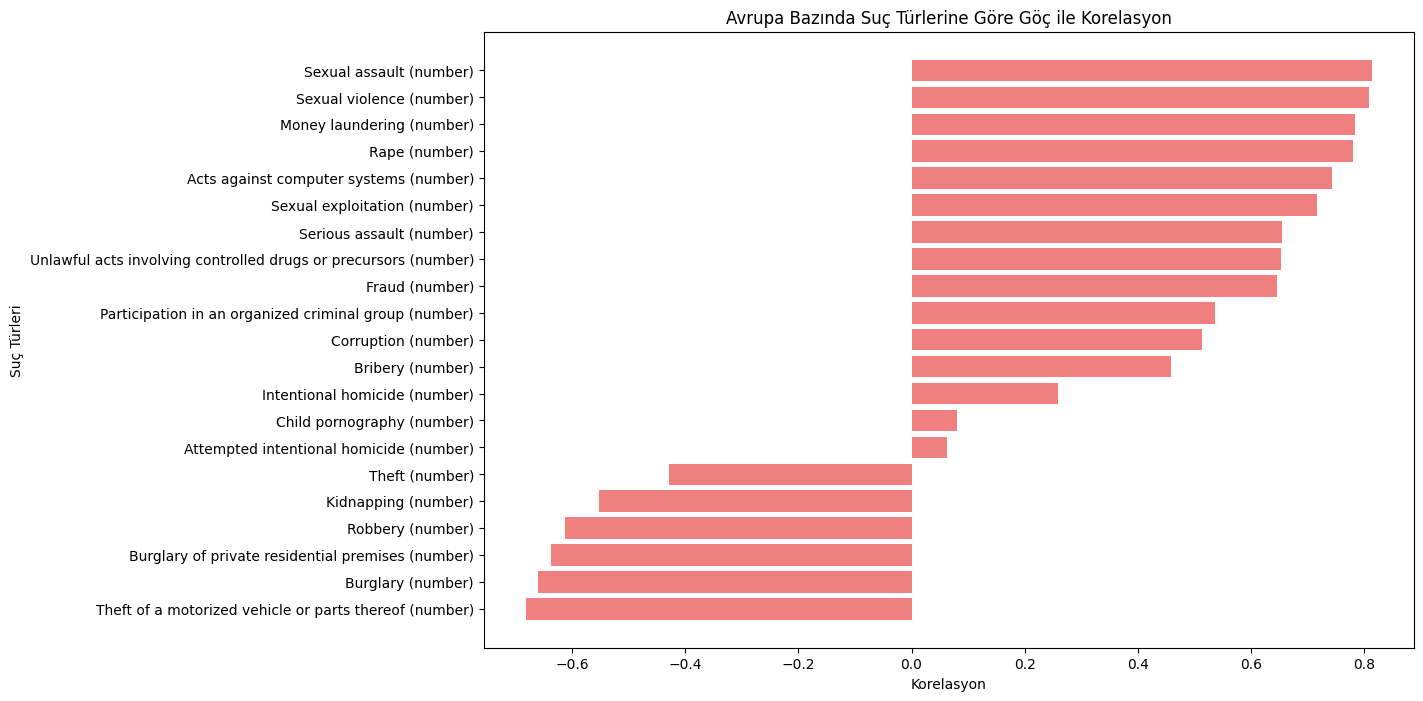

In [11]:

# Suç türlerine göre korelasyon
correlations_europe = {}

# Sadece "number" metrikli suç türlerini seç
crime_columns = [col for col in europe_total.columns if "(number)" in col]

# Her suç türü için toplam göç ile korelasyonu hesapla
for crime in crime_columns:
    corr = europe_total[crime].corr(europe_total['Migration Data'])
    correlations_europe[crime] = corr

# Korelasyonları büyükten küçüğe sıralama
sorted_europe_correlations = sorted(correlations_europe.items(), key=lambda x: x[1], reverse=True)

# Sıralanmış korelasyonları yazdır
print("Avrupa Bazında Suç Türlerine Göre Korelasyonlar (Büyükten Küçüğe):")
for crime, corr_value in sorted_europe_correlations:
    print(f"{crime}: {corr_value}")
# Bar Grafiği ile Görselleştirme
crimes, corr_values = zip(*sorted_europe_correlations)  # Sıralanmış veriyi ayır
plt.figure(figsize=(12, 8))
plt.barh(crimes, corr_values, color='lightcoral')
plt.xlabel("Korelasyon")
plt.ylabel("Suç Türleri")
plt.title("Avrupa Bazında Suç Türlerine Göre Göç ile Korelasyon")
plt.gca().invert_yaxis()  # Büyükten küçüğe sıralama için
plt.show()